In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [2]:
diabetes_dataset = pd.read_csv(r"diabetes.csv")
print("Number of instances and features: ", diabetes_dataset.shape)
print("\nFirst five\n----------------------")
diabetes_dataset.head()

Number of instances and features:  (768, 9)

First five
----------------------


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**1- diabetic 0- Not**

In [3]:
print("\nLast five\n----------------------")
diabetes_dataset.tail()


Last five
----------------------


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [4]:
diabetes_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


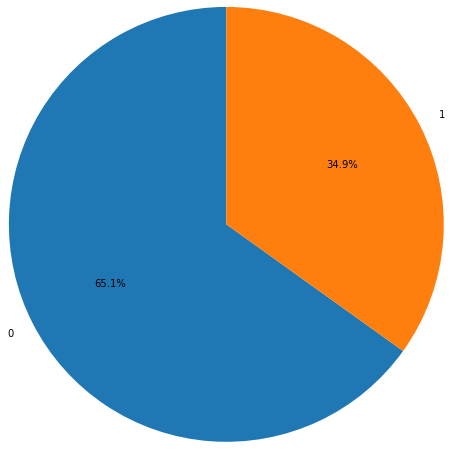

In [6]:
temp = diabetes_dataset['Outcome'].value_counts().plot.pie(autopct = "%1.1f%%", radius = 2.5, startangle = 90)
temp.set_ylabel('')
plt.show()

In [7]:
def count_plot(feature):
    plt.rcParams['figure.figsize'] = (20,10) # columns, rows
    sns.countplot(x = feature, data = diabetes_dataset, palette = random.choice(['Set1', 'dark', 'prism', 'Set2']))
    plt.title(feature.upper(), fontsize = 20)
    plt.show()

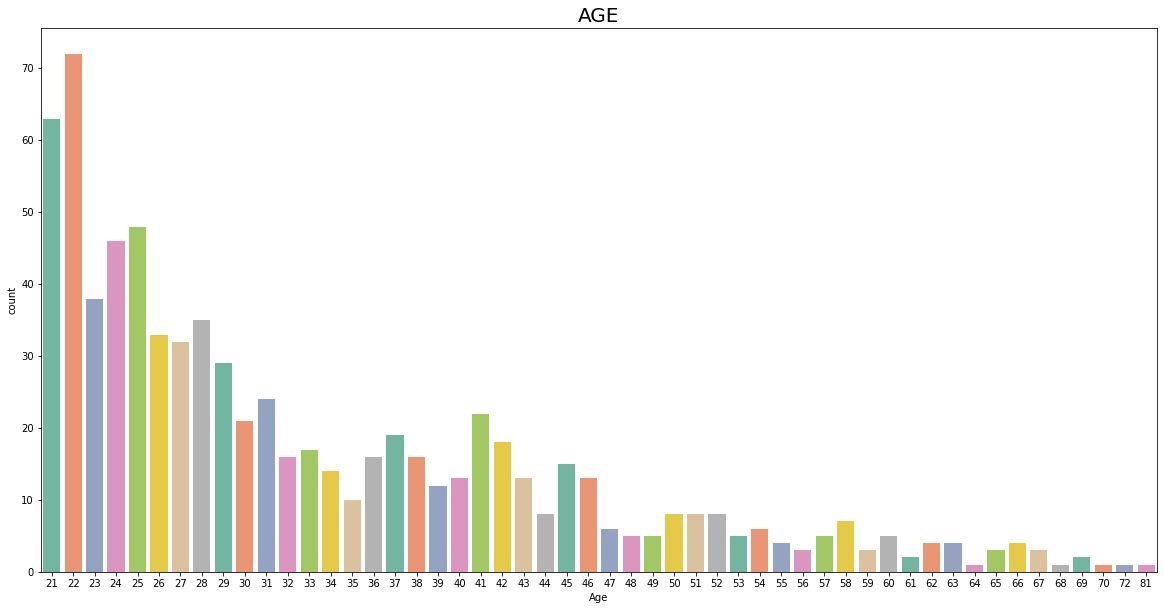

In [8]:
count_plot('Age')

In [9]:
features = diabetes_dataset.columns.tolist()
features.remove('Outcome')
features

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [10]:
def violin_plot(feature):
    sns.violinplot(y = feature, data = diabetes_dataset, color = random.choice(['r', 'b', 'g']))
    plt.title(feature.upper(), fontsize = 15)

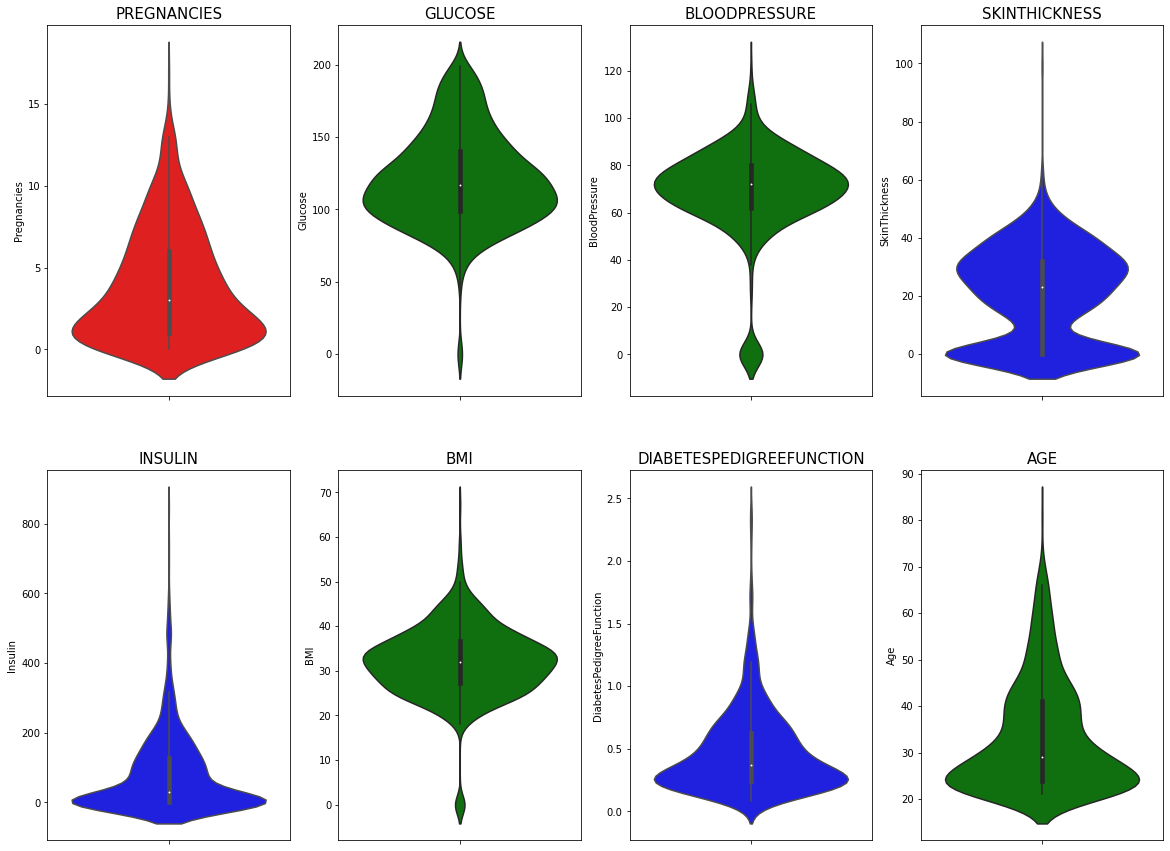

In [11]:
plt.rcParams['figure.figsize'] = (20,15)
sub_plot_seed = 241
for feature in features:
    plt.subplot(sub_plot_seed)
    violin_plot(feature)
    sub_plot_seed += 1
    
plt.show()

In [12]:
def comparison_plot(feature):
    sns.barplot(y = feature, x = 'Outcome', data = diabetes_dataset)
    plt.title(feature + " v/s Outcome", fontsize = 15)

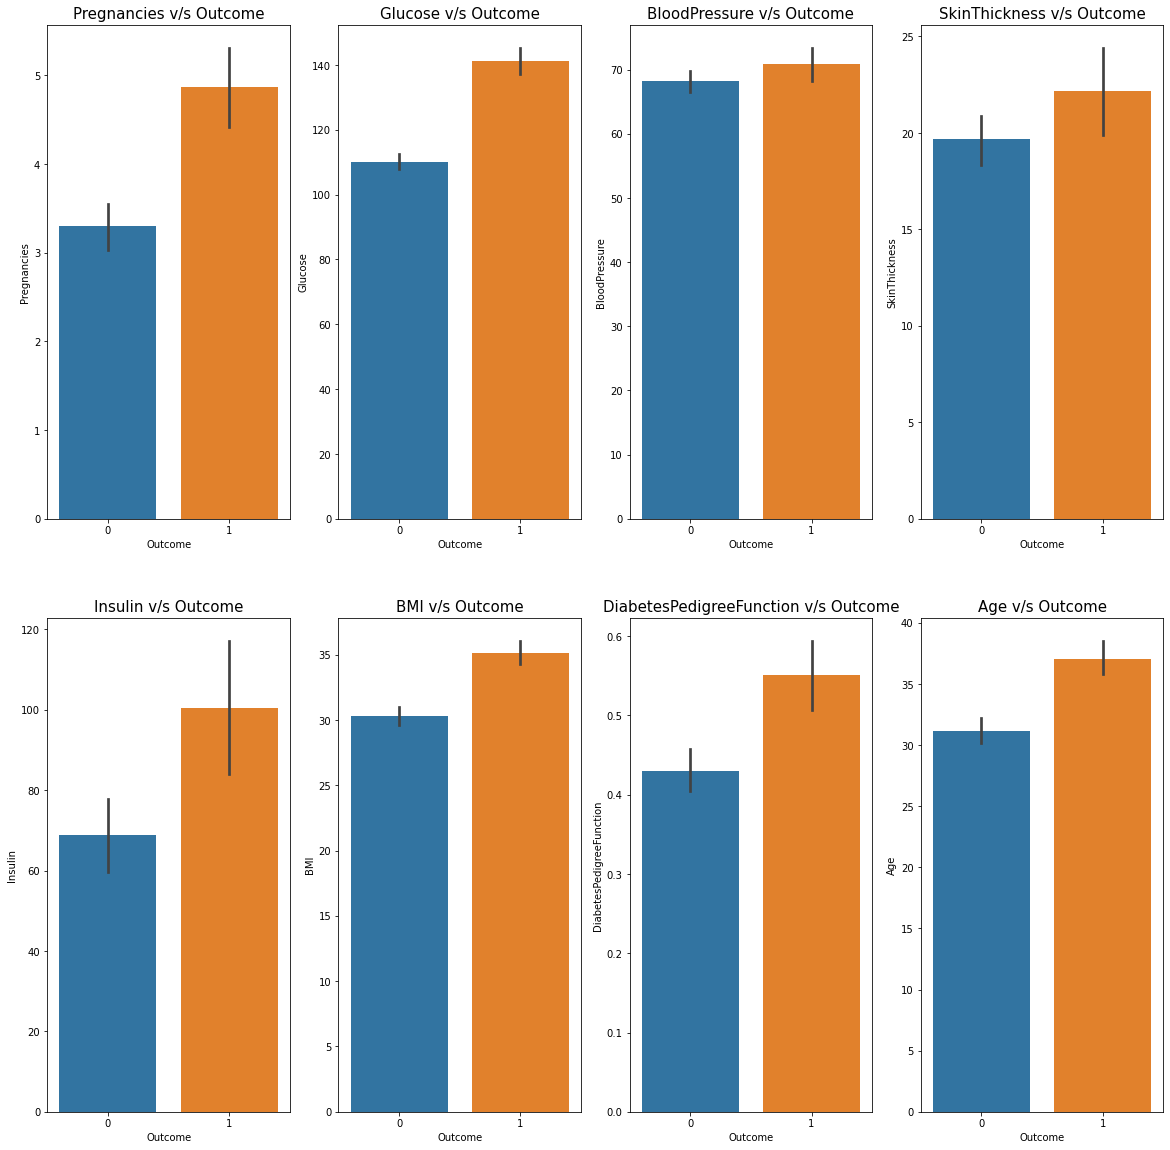

In [13]:
plt.rcParams['figure.figsize'] = (20,20)
sub_plot_seed = 241
for feature in features:
    plt.subplot(sub_plot_seed)
    comparison_plot(feature)
    sub_plot_seed += 1
    
plt.show()